In [1]:
from dlforecasting.models import RNNForecaster
model = RNNForecaster(rnn_units=[100, 100, 100], dropout=0.6) # Dropout is crucial

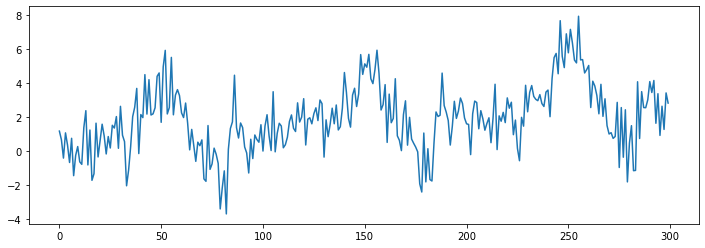

In [2]:
# Generate series
# A random walk
#from dlforecasting.generate_series import RWGenerator
#ts = RWGenerator(300, baseline=10.0).generate()

# A time series with seasonality, noise and trend
from dlforecasting.generate_series import TSGenerator
ts = TSGenerator(timesteps=300, baseline=0, slope= 0.01, period=100, amplitude=3, phase=0, season_split=0.5).generate()

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(ts)

In [3]:
model.fit(ts, epochs=100, window_size=30, batch_size=32, verbose=0)
pred = model.predict(ts)

Training completed
Predicted values from window_size-1 to len(series)


1.0170766592100642

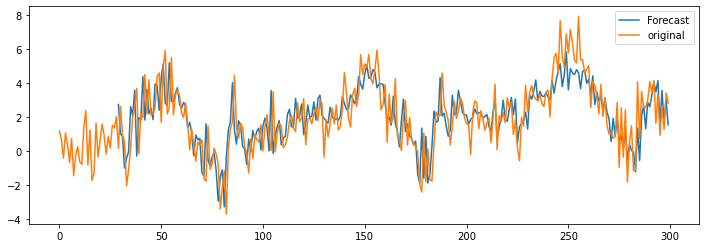

In [4]:
import numpy as np
plt.figure(figsize=(12,4))
plt.plot(np.arange(29, 300), pred, label='Forecast')
plt.plot(ts, label='original')
plt.legend()
from sklearn.metrics import mean_absolute_error as mae
mae(ts[29:],pred)

## Model on differenced series

In [32]:
from dlforecasting.stationary import Stationarity
sta = Stationarity()
diff = sta.transform(ts)
d = sta.d
b = sta.baselines

>>  1 differencing
KPSS stationary: True
ADF stationary: True


/home/erick/anaconda3/envs/ts/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [33]:
model.fit(diff, epochs=400, window_size=30, batch_size=32, verbose=0)
diff_pred = model.predict(diff)

Training completed
Predicted values from window_size-1 to len(series)


1.8834013321064609

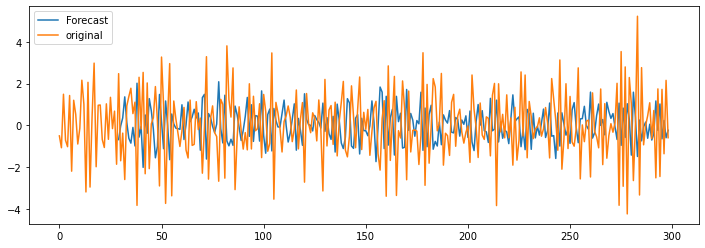

In [34]:
plt.figure(figsize=(12,4))
plt.plot(np.arange(29, 299), diff_pred, label='Forecast')
plt.plot(diff, label='original')
plt.legend()
from sklearn.metrics import mean_absolute_error as mae
mae(diff[29:],diff_pred)

In [37]:
# dediff
from dlforecasting.tools import *
dediff_pred = dediff(-diff_pred, baselines=b, d=d)

4.953287864082988

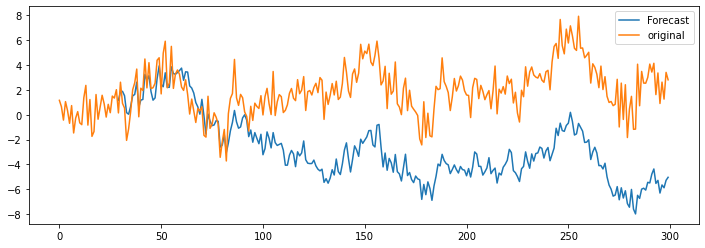

In [38]:
plt.figure(figsize=(12,4))
plt.plot(np.arange(29, 300), dediff_pred, label='Forecast')
plt.plot(ts, label='original')
plt.legend()
from sklearn.metrics import mean_absolute_error as mae
mae(ts[29:], dediff_pred)